<a href="https://colab.research.google.com/github/kkmax-develop/FruitDiscrimination/blob/master/Sample_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# GPUが割り当てられているかチェック
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### **ライブラリのインポート**

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

#画像認識関連ライブラリ
from tensorflow import keras
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model

### **データの前処理**

ImageDataGeneratorクラスのインスタンスを作成。各引数の意味は公式ドキュメントを参照。

https://keras.io/ja/preprocessing/image/

In [3]:
# データ拡張の定義。データ拡張は行わず、正規化とデータ分割のみ実施。trainデータとvalidationデータは8：2で設定。
datagen = image.ImageDataGenerator(rescale=1.0 / 255,validation_split = 0.2)

In [4]:
# ImageDataGeneratorを使用してデータの読み込みと拡張
batch_size = 128
IMG_WIDTH = 64
IMG_HEIGHT = 64
CHANNELS = 3
CLASSES = 131
train_dir = "/content/drive/My Drive/Colab Notebooks/FruitDiscrimination/data/training"
TARGET = ["Apple Golden 1","Avocado","Banana","Blueberry","Cherry 1","Grape Pink","Kaki",
         "Lemon","Mango","Onion Red","Peach","Strawberry","Tomato 1"]

train_generator = datagen.flow_from_directory(
            train_dir,
            target_size=(IMG_WIDTH,IMG_HEIGHT),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True,
            #classes=TARGET,
            subset = "training" 
        )

Found 54191 images belonging to 131 classes.


In [5]:
# validationデータの読み込み
validation_generator = datagen.flow_from_directory(
            train_dir,
            target_size=(IMG_WIDTH,IMG_HEIGHT),
            batch_size=batch_size,
            class_mode='categorical',
            #classes=TARGET,
            subset = "validation" 
        )

Found 13502 images belonging to 131 classes.


### **モデル作成**

In [6]:
# CNNのモデル作成
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(IMG_WIDTH,IMG_HEIGHT,CHANNELS)))
model.add(MaxPooling2D((2,2)))
 
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
 
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
 
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2),padding="SAME"))
 
model.add(Flatten())
 
model.add(Dense(512,activation="relu"))
model.add(Dense(CLASSES,activation="sigmoid"))
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         1

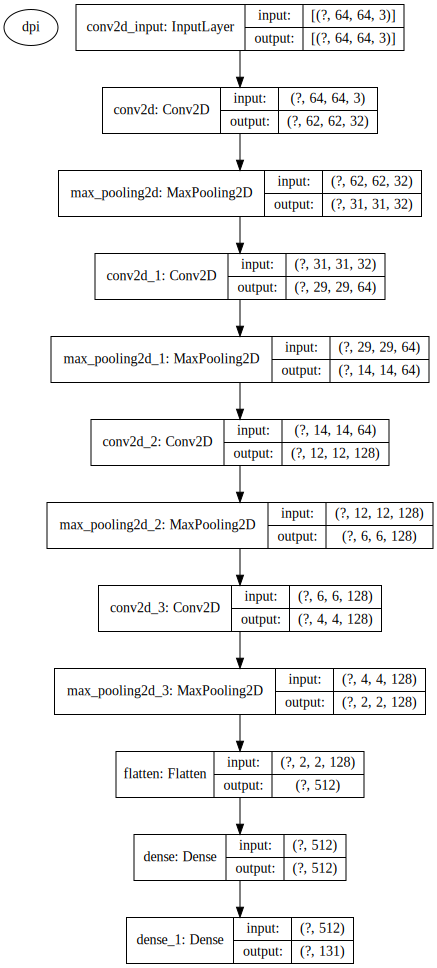

In [7]:
# 作成したモデルの可視化
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, dpi=None).create(prog='dot', format='svg'))

In [ ]:
# モデルの学習方法について指定
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.RMSprop(lr=1e-4, decay = 1e-6),
              metrics=['accuracy'])
 
STEP_SIZE_TRAIN=train_generator.n // train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n  // validation_generator.batch_size
epochs = 10

# 学習 
result = model.fit_generator(train_generator,
                             steps_per_epoch=STEP_SIZE_TRAIN,
                             epochs=epochs,
                             validation_data=validation_generator,
                             validation_steps=STEP_SIZE_VALID)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
103/423 [======>.......................] - ETA: 2:46:33 - loss: 4.6149 - accuracy: 0.0391

In [ ]:
result.history.keys()

### **学習状況の可視化**

In [ ]:
plt.style.use('fivethirtyeight')
plt.title('Model Accuracy')
plt.plot(range(1, epochs+1), result.history['accuracy'], label="training")
plt.plot(range(1, epochs+1), result.history['val_accuracy'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.style.use('fivethirtyeight')
plt.title('Model Loss')
plt.plot(range(1, epochs+1), result.history['loss'], label="training")
plt.plot(range(1, epochs+1), result.history['val_loss'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **モデルの保存**

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/FruitDiscrimination/model/BaseModel_CNN.h5') 